In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import statsmodels.formula.api as sm
%matplotlib inline

In [62]:
train_df = pd.read_csv('../../../Data/train.csv', index_col = 0)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
train_df.shape

(1460, 80)

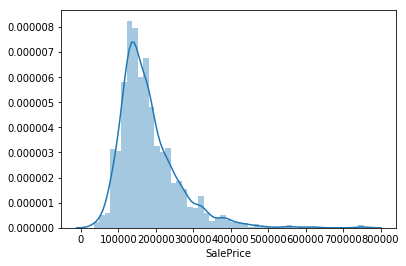

In [64]:
sns.distplot(train_df['SalePrice'])

In [65]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    ms = ms[ms['Percent']>0]
    return ms

In [66]:
missing_values(train_df)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [67]:
train_df.dropna(axis = 1, thresh = len(train_df)*0.85, inplace = True)

In [68]:
train_df.isnull().sum().sort_values(ascending = False).head(15)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
YearRemodAdd     0
ExterQual        0
dtype: int64

In [69]:
for i in train_df.select_dtypes(include = np.number):
    train_df[i].fillna(train_df[i].median(), inplace = True)

In [70]:
for i in train_df.select_dtypes(include = 'object'):
    train_df[i].fillna(train_df[i].mode()[0], inplace = True)

In [71]:
train_df.corr()['SalePrice'].sort_values(ascending = False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

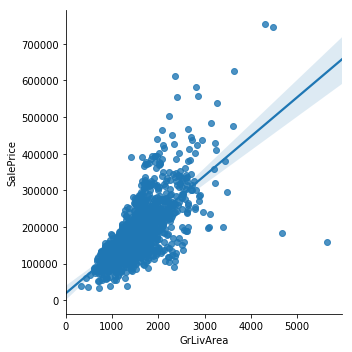

In [72]:
df = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df)

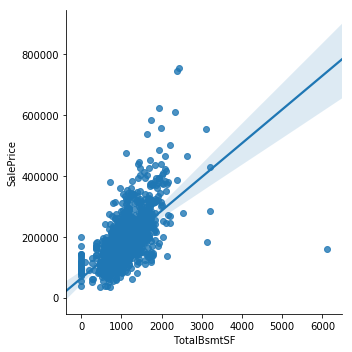

In [73]:
df = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis = 1)
sns.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df)

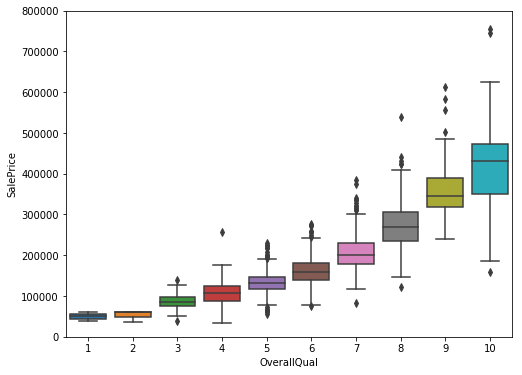

In [74]:
df = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);

In [75]:
train_df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

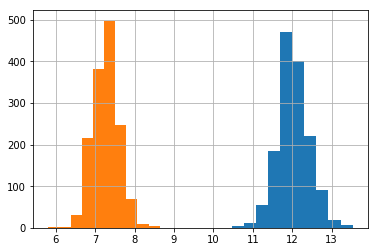

In [76]:
train_df['SalePrice'].apply(np.log).hist()
train_df['GrLivArea'].apply(np.log).hist()
plt.show()

In [77]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [78]:
num_df = train_df.select_dtypes(include = np.number)
num_corr = num_df.corr()['SalePrice'][:-1]

In [79]:
golden_features = num_corr[abs(num_corr)>0.5].sort_values(ascending = False)
golden_features

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [80]:
features = train_df[golden_features.index]

In [98]:
features = features.drop(columns = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF'])

In [99]:
X = features
y = train_df['SalePrice']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)

In [101]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
b = float(lm.intercept_)

In [103]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [104]:
print("Intercept:", float(b))

Intercept: -110815.7002146235


In [105]:
coeff

,Coefficient
OverallQual,24675.256509
GrLivArea,47.002292
GarageCars,4425.849562
GarageArea,50.716802
1stFlrSF,36.111769
FullBath,211.517276
TotRmsAbvGrd,-549.956708


In [106]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 1379985593.6022117


In [107]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 2252965777.2194843
